<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-visualing-the-dataset" data-toc-modified-id="Load-and-visualing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and visualing the dataset</a></span></li><li><span><a href="#Analyse-&amp;-Commentary-on-the-dataset" data-toc-modified-id="Analyse-&amp;-Commentary-on-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse &amp; Commentary on the dataset</a></span></li><li><span><a href="#Prediction-with-ARMA/ARIMA" data-toc-modified-id="Prediction-with-ARMA/ARIMA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prediction with ARMA/ARIMA</a></span><ul class="toc-item"><li><span><a href="#Test-for-stationarity" data-toc-modified-id="Test-for-stationarity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test for stationarity</a></span><ul class="toc-item"><li><span><a href="#Gross-data-analysis" data-toc-modified-id="Gross-data-analysis-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Gross data analysis</a></span></li><li><span><a href="#Taking-the-monthy-difference" data-toc-modified-id="Taking-the-monthy-difference-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Taking the monthy difference</a></span></li></ul></li><li><span><a href="#Autocorrelation-(acf)-&amp;-Partial-autocorrelation-(pacf)" data-toc-modified-id="Autocorrelation-(acf)-&amp;-Partial-autocorrelation-(pacf)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Autocorrelation (acf) &amp; Partial autocorrelation (pacf)</a></span><ul class="toc-item"><li><span><a href="#Gross-data" data-toc-modified-id="Gross-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Gross data</a></span></li><li><span><a href="#Diff-data" data-toc-modified-id="Diff-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Diff data</a></span></li></ul></li><li><span><a href="#Build-ARIMA-Model" data-toc-modified-id="Build-ARIMA-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build ARIMA Model</a></span><ul class="toc-item"><li><span><a href="#Build-a-ARMA(4,6)" data-toc-modified-id="Build-a-ARMA(4,6)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Build a ARMA(4,6)</a></span><ul class="toc-item"><li><span><a href="#Prediction" data-toc-modified-id="Prediction-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Back-to-level-data" data-toc-modified-id="Back-to-level-data-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Back to level data</a></span></li></ul></li></ul></li></ul></li></ul></div>

Brief : https://github.com/JTreguer/ia-bdx-ts-project2/blob/master/README.md  
Dataset on : https://data.world/environmentdata/climate-change-earth-surface  
more on : http://berkeleyearth.lbl.gov/regions/global-land

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load and visualing the dataset

In [2]:
df_init = pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv")
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [3]:
df_init['dt'] = pd.to_datetime(df_init['dt'])
df_init.sort_values('dt', inplace=True)
df_init.set_index('dt', inplace=True)

print(df_init.shape)

df_init.head()

(3192, 8)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_init_v1= df_init["LandAverageTemperature"].copy()
df_init_v1 = pd.DataFrame(df_init_v1)
df_init_v1

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [5]:
df_init_v1b = df_init_v1.loc["1753-01-01":"2015-12-01"].copy()
df_init_v1b 

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


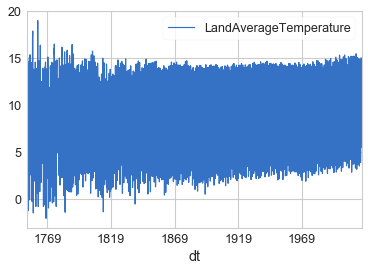

In [6]:
df_init_v1b.plot.line()

# Analyse & Commentary on the dataset

- Monthly time series
- 3192 data initially, but presented 12 NaN
- dropping NaN data, we have 3156 from January 1753 to December 2015 
- Time series are with no trend
- Time series seem presenting lots of seasonality

# Prediction with ARMA/ARIMA

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

## Test for stationarity

https://machinelearningmastery.com/time-series-data-stationary-python/

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.  

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


ADF Statistic

The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (ADF is less than -3.449) (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

### Gross data analysis

In [8]:
temp=df_init_v1b.copy()
temp

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [9]:
rolmean0 = temp.rolling(20).mean()
rolstd0 = temp.rolling(20).std()

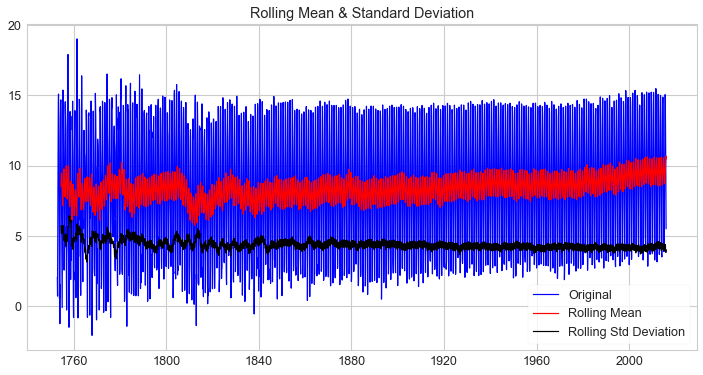

In [10]:
plt.figure(figsize=(12, 6))
orig0 = plt.plot(temp, color='blue', label='Original')
mean0 = plt.plot(rolmean0, color='red', label='Rolling Mean')
std0 = plt.plot(rolstd0, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

<Figure size 1080x432 with 0 Axes>

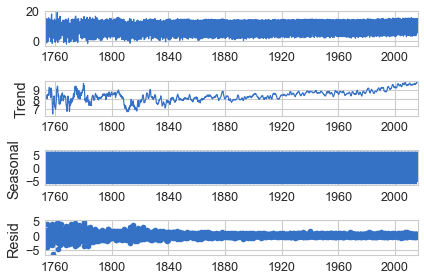

In [11]:
plt.figure(figsize=(15, 6))
result0 = seasonal_decompose(temp, model='additive')
result0.plot()
plt.show()

In [12]:
# Perform Dickey-Fuller test
res_DF0 = adfuller(temp)
print('ADF Statistic: %f' % res_DF0[0])
print('p-value: %f' % res_DF0[1])
print('Critical Values:')
for key, value in res_DF0[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.675041
p-value: 0.004478
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Taking the monthy difference 

In [13]:
df_init_v1b['diff'] = df_init_v1b['LandAverageTemperature'].diff()
df_init_v1b.head(5)

,LandAverageTemperature,diff
dt,,
1753-01-01,2.039,NaN
1753-02-01,0.715,-1.324
1753-03-01,5.424,4.709
1753-04-01,8.272,2.848
1753-05-01,12.186,3.914


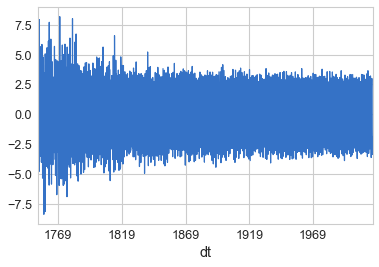

In [14]:
df_init_v1b['diff'].plot.line()

In [15]:
startValue = df_init_v1b['LandAverageTemperature']["1753-01-01"]
tempDiff=df_init_v1b['diff'].loc["1753-02-01":"2015-12-01"]
print(tempDiff.shape)
print(startValue)

(3155,)
2.039


In [16]:
rolmean = tempDiff.rolling(20).mean()
rolstd = tempDiff.rolling(20).std()

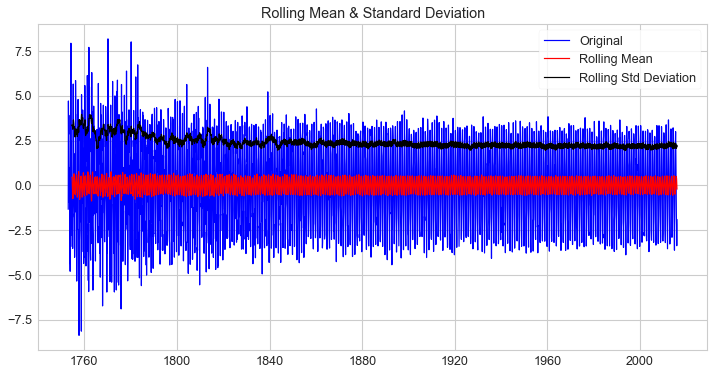

In [17]:
plt.figure(figsize=(12, 6))
orig = plt.plot(tempDiff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

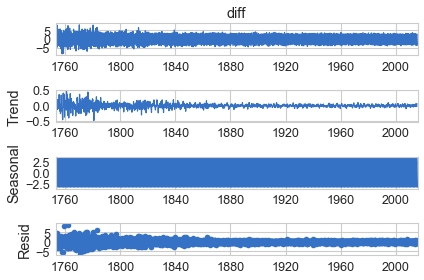

In [18]:
result = seasonal_decompose(tempDiff, model='additive')
result.plot()
plt.show()

In [19]:
# Perform Dickey-Fuller test
res_DF = adfuller(tempDiff)
print('ADF Statistic: %f' % res_DF[0])
print('p-value: %f' % res_DF[1])
print('Critical Values:')
for key, value in res_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.010767
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## Autocorrelation (acf) & Partial autocorrelation (pacf)

### Gross data

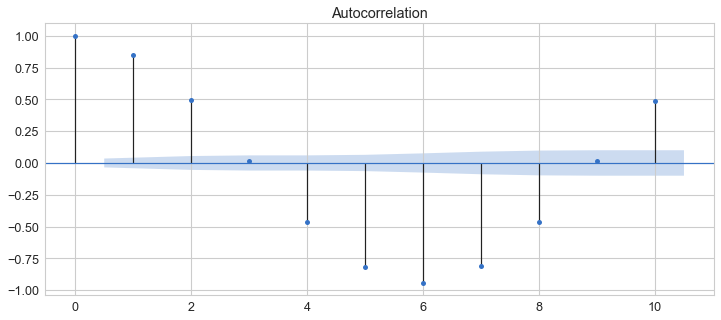

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
# the autocorrelation chart provides just the correlation at increasing lags
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(temp.values, lags=10, ax=ax)
plt.show()

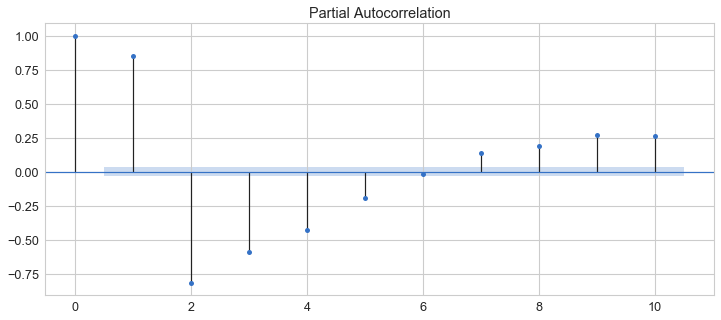

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(temp.values, lags=10, ax=ax)
plt.show()

### Diff data

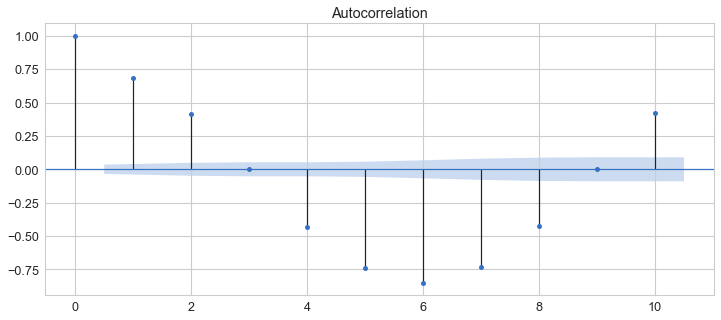

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(tempDiff.values, lags=10, ax=ax)
plt.show()

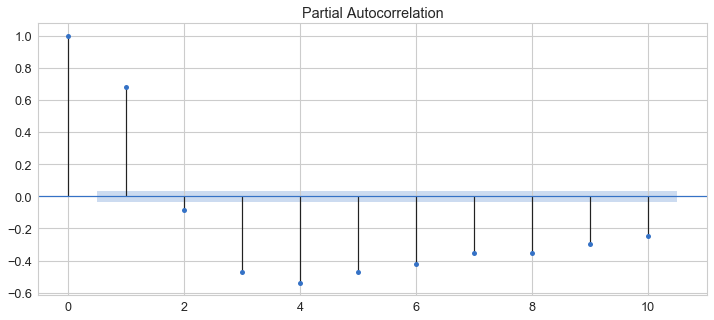

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(tempDiff.values, lags=10, ax=ax)
plt.show()

## Build ARIMA Model

### Build a ARMA(4,6)

In [24]:
from statsmodels.tsa.arima_model import ARMA

arma = ARMA(tuple(tempDiff.values), (4,6)).fit()
arma.summary()



C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3155
Model:                     ARMA(4, 6)   Log Likelihood               -3609.893
Method:                       css-mle   S.D. of innovations              0.759
Date:                Wed, 25 Mar 2020   AIC                           7243.785
Time:                        16:49:19   BIC                           7316.466
Sample:                             0   HQIC                          7269.862
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.621      0.535      -0.001       0.002
ar.L1.y        1.4804        nan        nan        nan         nan         nan
ar.L2.y       -0.5108        nan        nan        nan         nan         nan
ar.L3.y       -0.3441        nan        nan        nan         nan         nan
ar.L4.y        0.0534      0.002     26.565      0.000       0.049       0.057
ma.L1.y       -2.1654      0.018   -122.006      0.000      -2.200      -2.131
ma.L2.y        1.3768      0.043     31.953      0.000       1.292       1.461
ma.L3.y        0.1538      0.049      3.164      0.002       0.059       0.249
ma.L4.y       -0.3571      0.048     -7.378      0.000      -0.452      -0.262
ma.L5.y        0.0764      0.046      1.662      0.097      -0.014       0.167
ma.L6.y       -0.0687      0.020     -3.467      0.001      -0.107      -0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8661           -0.5000j            1.0001           -0.0833
AR.2            0.8661           +0.5000j            1.0001            0.0833
AR.3           -2.5712           -0.0000j            2.5712           -0.5000
AR.4            7.2781           -0.0000j            7.2781           -0.0000
MA.1            1.0367           -0.0000j            1.0367           -0.0000
MA.2            0.8778           -0.5036j            1.0119           -0.0829
MA.3            0.8778           +0.5036j            1.0119            0.0829
MA.4           -1.8590           -0.0000j            1.8590           -0.5000
MA.5            0.0900           -2.7150j            2.7165           -0.2447
MA.6            0.0900           +2.7150j            2.7165            0.2447
-----------------------------------------------------------------------------
"""

#### Prediction

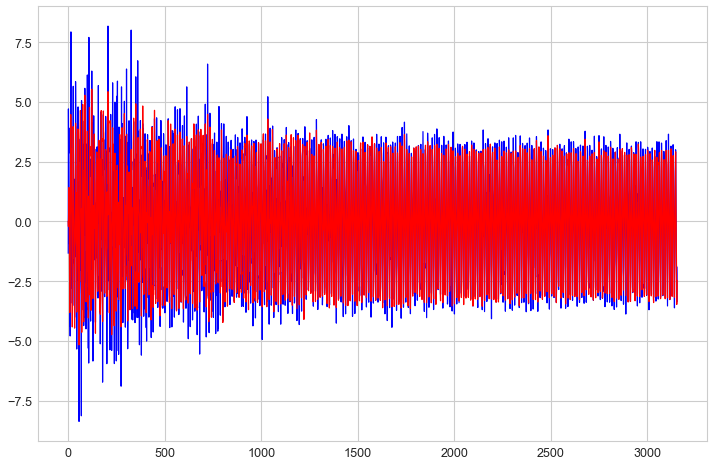

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(tempDiff.values, color='blue')
preds = arma.fittedvalues
plt.plot(preds, color='red')
plt.show()



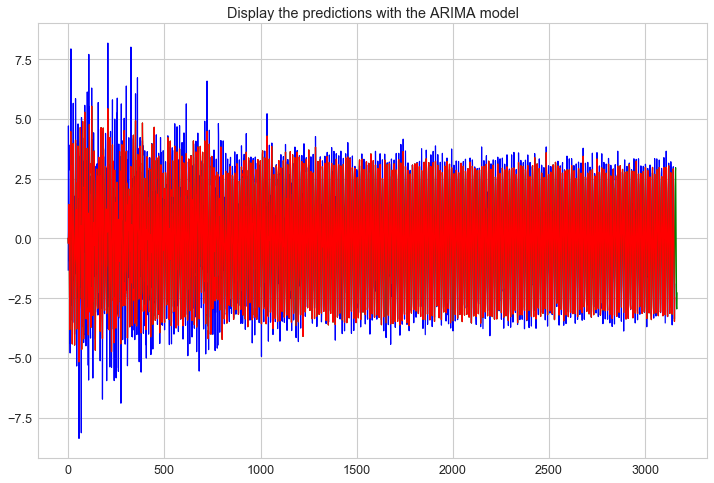

In [26]:
steps = 12

plt.figure(figsize=(12, 8))

plt.plot(tempDiff.values, color='blue')

forecast = arma.forecast(steps=steps)[0]
p0 = preds
f0 =  forecast
predForecast0= np.append(p0,f0)
predForecast0 = pd.DataFrame(predForecast0)

plt.plot(predForecast0, color='green')
plt.plot(p0, color='red')
plt.title('Display the predictions with the ARIMA model')

plt.show()


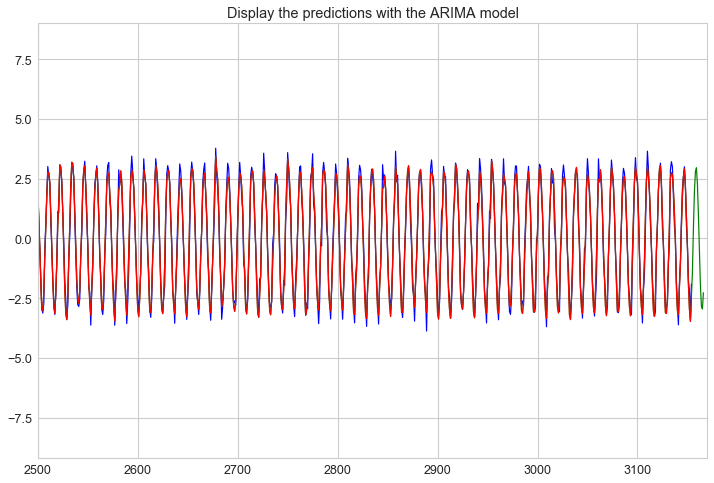

In [27]:
steps = 12

plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_xlim([2500,3170])

plt.plot(tempDiff.values, color='blue')

forecast = arma.forecast(steps=steps)[0]
p0 = preds
f0 =  forecast
predForecast0= np.append(p0,f0)
predForecast0 = pd.DataFrame(predForecast0)

plt.plot(predForecast0, color='green')
plt.plot(p0, color='red')
plt.title('Display the predictions with the ARIMA model')

plt.show()


#### Back to level data

<function matplotlib.pyplot.show(*args, **kw)>

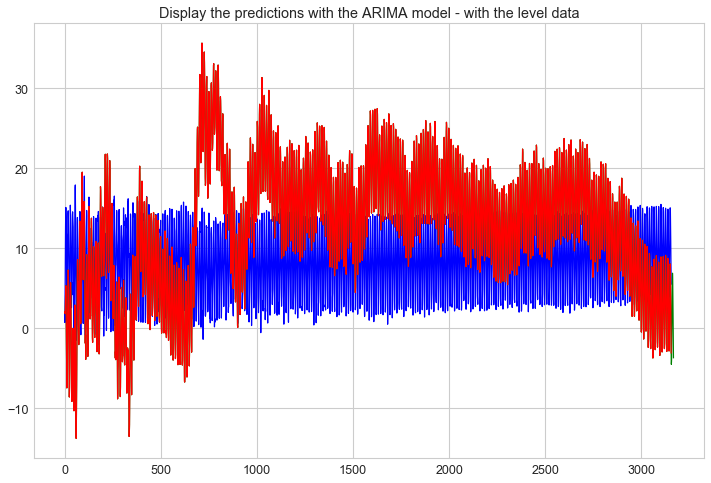

In [28]:
plt.figure(figsize=(12, 8))

tempLevel0 = np.append(startValue,tempDiff).cumsum()
plt.plot(tempLevel0, color='blue')


tempLevel_Forecast0 = np.append(startValue,predForecast0).cumsum()
plt.plot(tempLevel_Forecast0,color='green')

tempLevel_pred0 = np.append(startValue,p0).cumsum()
plt.plot(tempLevel_pred0,color='red')
plt.title('Display the predictions with the ARIMA model - with the level data')

plt.show

In [29]:
xtempLevel = pd.DataFrame (tempLevel0)
xtempLevel.tail(5)

,0
3151,14.755
3152,12.999
3153,10.801
3154,7.433
3155,5.518


<function matplotlib.pyplot.show(*args, **kw)>

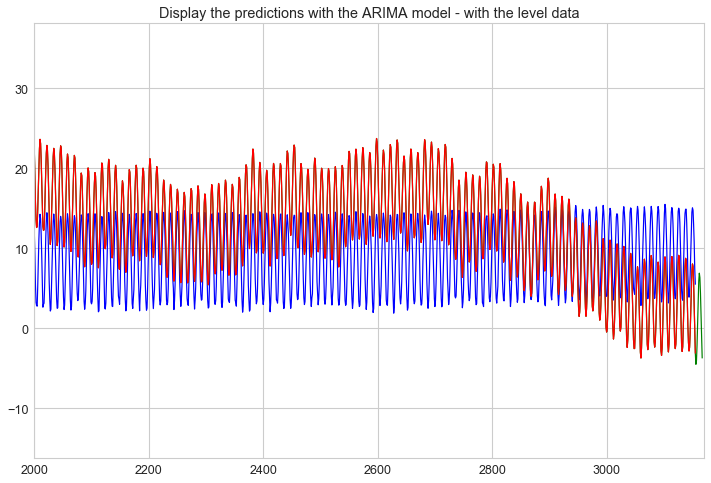

In [30]:
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_xlim([2000,3170])

tempLevel0 = np.append(startValue,tempDiff).cumsum()
plt.plot(tempLevel0, color='blue')


tempLevel_Forecast0 = np.append(startValue,predForecast0).cumsum()
plt.plot(tempLevel_Forecast0,color='green')

tempLevel_pred0 = np.append(startValue,p0).cumsum()
plt.plot(tempLevel_pred0,color='red')

plt.title('Display the predictions with the ARIMA model - with the level data')

plt.show